## 0. Install and Import Dependencies

In [44]:
#installing easyocr module to extract text from images
!pip install easyocr        
     

#installing imutils for image processing
!pip install imutils

In [57]:
#Importingcv2 for image processing
import cv2

#Importing necessary libraries
from matplotlib import pyplot as plt

import numpy as np

import imutils

import easyocr

## 1. Read in Image, Grayscale and Blur

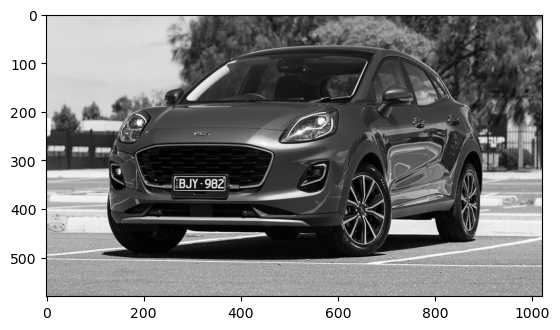

In [58]:
#Reading and displaying image

img = cv2.imread('image3.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

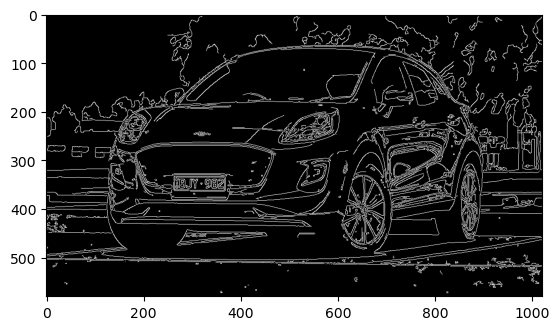

In [59]:
#Noise reduction 
bfilter= cv2.bilateralFilter(gray, 11, 17, 17) 

#Edge detection
edged = cv2.Canny(bfilter, 30, 200) 

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [60]:

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(keypoints)

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [61]:

location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [62]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [63]:

mask = np.zeros(gray.shape, np.uint8)

new_image = cv2.drawContours(mask, [location], 0,255, -1)

new_image = cv2.bitwise_and(img, img, mask=mask)

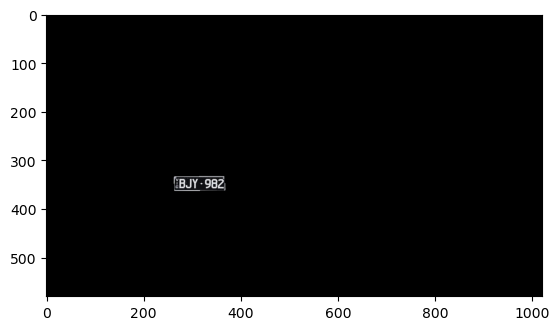

In [64]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [65]:

(x,y) = np.where(mask==255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

cropped_image = gray[x1:x2+1, y1:y2+1]

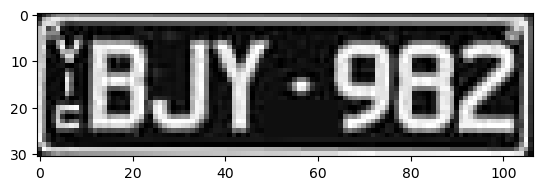

In [66]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use easyocr to read text

In [67]:

reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

result

[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3615004186362523)]